# **IST 707 HW 2 - Kmeans , HAC , DT**

## Name : Ritika Shetty 
## SUID: 615009648

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from scipy.spatial import distance_matrix
from sklearn.cluster import KMeans

In [102]:
import os

os.chdir('C:/Users/ritshetty/Desktop/iSchool FALL 19/IST 707 Data Analytics/HW 2')

In [103]:
data = pd.read_csv('Disputed_Essay_data.csv')

In [104]:
data.head()

,author,filename,a,all,also,an,and,any,are,as,...,was,were,what,when,which,who,will,with,would,your
0,dispt,dispt_fed_49.txt,0.280,0.052,0.009,0.096,0.358,0.026,0.131,0.122,...,0.009,0.017,0.000,0.009,0.175,0.044,0.009,0.087,0.192,0.0
1,dispt,dispt_fed_50.txt,0.177,0.063,0.013,0.038,0.393,0.063,0.051,0.139,...,0.051,0.000,0.000,0.000,0.114,0.038,0.089,0.063,0.139,0.0
2,dispt,dispt_fed_51.txt,0.339,0.090,0.008,0.030,0.301,0.008,0.068,0.203,...,0.008,0.015,0.008,0.000,0.105,0.008,0.173,0.045,0.068,0.0
3,dispt,dispt_fed_52.txt,0.270,0.024,0.016,0.024,0.262,0.056,0.064,0.111,...,0.087,0.079,0.008,0.024,0.167,0.000,0.079,0.079,0.064,0.0
4,dispt,dispt_fed_53.txt,0.303,0.054,0.027,0.034,0.404,0.040,0.128,0.148,...,0.027,0.020,0.020,0.007,0.155,0.027,0.168,0.074,0.040,0.0


In [105]:
data['author'].value_counts()

Hamilton    51
Madison     15
dispt       11
Jay          5
HM           3
Name: author, dtype: int64

In [106]:
train = data.loc[data['author'] != 'dispt']
xtrain=train.drop(['author','filename'],axis=1)
ytrain= train['author']

test = data.loc[data['author'] == 'dispt']
xtest = test.drop(['author','filename'],axis=1)
ytest = test['author']



In [107]:
print("***** Train_Set *****")
print(xtrain.head())
print("\n")
print("***** Test_Set *****")
print(xtest.head())

***** Train_Set *****
        a    all   also     an    and    any    are     as     at     be  ...  \
11  0.213  0.083  0.000  0.083  0.343  0.056  0.111  0.093  0.065  0.315  ...   
12  0.369  0.070  0.006  0.076  0.411  0.023  0.053  0.117  0.065  0.258  ...   
13  0.305  0.047  0.007  0.068  0.386  0.047  0.102  0.108  0.088  0.271  ...   
14  0.391  0.045  0.015  0.030  0.270  0.045  0.060  0.090  0.015  0.376  ...   
15  0.327  0.096  0.000  0.086  0.356  0.014  0.086  0.072  0.115  0.211  ...   

      was   were   what   when  which    who   will   with  would   your  
11  0.000  0.000  0.000  0.009  0.158  0.074  0.222  0.046  0.019  0.074  
12  0.000  0.012  0.012  0.012  0.147  0.029  0.094  0.129  0.270  0.000  
13  0.000  0.000  0.007  0.000  0.156  0.007  0.074  0.122  0.149  0.000  
14  0.000  0.000  0.000  0.045  0.165  0.045  0.135  0.150  0.210  0.000  
15  0.014  0.038  0.014  0.019  0.264  0.029  0.091  0.086  0.062  0.010  

[5 rows x 70 columns]


***** Test_Set *

In [108]:
print("***** Train_Set *****")
print(ytrain.head())
print("\n")
print("***** Test_Set *****")
print(ytest.head())

***** Train_Set *****
11    Hamilton
12    Hamilton
13    Hamilton
14    Hamilton
15    Hamilton
Name: author, dtype: object


***** Test_Set *****
0    dispt
1    dispt
2    dispt
3    dispt
4    dispt
Name: author, dtype: object


# Data Preprocessing

In [109]:
from sklearn import preprocessing
# Create a label (category) encoder object
le = preprocessing.LabelEncoder()
# Fit the encoder
le.fit(ytrain)

# Apply the fitted encoder 
y = le.transform(ytrain) 

In [110]:
df = pd.DataFrame({'Actual Labels' : ytrain[:],
                   'Encoded Label' : y[:]})

df



,Actual Labels,Encoded Label
11,Hamilton,1
12,Hamilton,1
13,Hamilton,1
14,Hamilton,1
15,Hamilton,1
16,Hamilton,1
17,Hamilton,1
18,Hamilton,1
19,Hamilton,1
20,Hamilton,1


In [111]:
scaler = preprocessing.MinMaxScaler()
np_scaled = scaler.fit_transform(xtrain)
xtrain_norm = pd.DataFrame(np_scaled, columns=xtrain.columns, index=xtrain.index)
xtrain_norm.describe()

,a,all,also,an,and,any,are,as,at,be,...,was,were,what,when,which,who,will,with,would,your
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,...,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,0.528780,0.334218,0.151524,0.366773,0.284567,0.364272,0.408468,0.473376,0.371736,0.572624,...,0.136065,0.186311,0.218018,0.160496,0.384823,0.259480,0.264930,0.383999,0.261068,0.031410
std,0.208475,0.216905,0.182721,0.170957,0.198460,0.208105,0.225887,0.190898,0.208691,0.197682,...,0.157131,0.193199,0.201870,0.185755,0.226637,0.201347,0.195480,0.227970,0.205736,0.140046
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.378378,0.171875,0.000000,0.247059,0.169288,0.201754,0.235000,0.364428,0.228814,0.472789,...,0.047619,0.064815,0.083333,0.000000,0.185897,0.125969,0.134731,0.205752,0.093834,0.000000
50%,0.550000,0.290179,0.127660,0.370588,0.240066,0.372807,0.346667,0.477612,0.326271,0.587302,...,0.079365,0.138889,0.166667,0.123288,0.351282,0.213178,0.208084,0.384956,0.198391,0.000000
75%,0.693919,0.468750,0.228723,0.451471,0.333195,0.489035,0.578333,0.574627,0.533898,0.698980,...,0.166667,0.263889,0.333333,0.202055,0.521795,0.346899,0.363024,0.504425,0.387399,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [112]:
scaler = preprocessing.MinMaxScaler()
np_scaled = scaler.fit_transform(xtest)
xtest_norm = pd.DataFrame(np_scaled, columns=xtest.columns, index=xtest.index)
xtest_norm.describe()

,a,all,also,an,and,any,are,as,at,be,...,was,were,what,when,which,who,will,with,would,your
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0
mean,0.478902,0.477961,0.251082,0.390443,0.435185,0.621488,0.436011,0.363128,0.330097,0.379361,...,0.306165,0.264672,0.454545,0.321867,0.606346,0.581818,0.455955,0.469697,0.244495,0.0
std,0.291464,0.293045,0.297450,0.340860,0.299505,0.288492,0.327818,0.298817,0.354655,0.307660,...,0.293104,0.277123,0.331915,0.312032,0.318446,0.333455,0.257227,0.253103,0.313530,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.309434,0.303030,0.047619,0.147436,0.233796,0.500000,0.145631,0.181564,0.067961,0.135135,...,0.097701,0.101266,0.260000,0.094595,0.528302,0.366667,0.315891,0.401961,0.046584,0.0
50%,0.388679,0.454545,0.142857,0.256410,0.435185,0.654545,0.407767,0.346369,0.233010,0.410811,...,0.206897,0.215190,0.360000,0.243243,0.660377,0.600000,0.395349,0.490196,0.136646,0.0
75%,0.630189,0.583333,0.380952,0.679487,0.631944,0.836364,0.665049,0.455307,0.378641,0.524324,...,0.408046,0.335443,0.700000,0.472973,0.825472,0.866667,0.589147,0.558824,0.245342,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [113]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = pd.DataFrame(euclidean_distances(xtrain_norm, xtrain_norm),
                           index=xtrain_norm.index,
                           columns=xtrain_norm.index)


# Build Kmeans

### Elbow Method to Find the Optimal Value of K

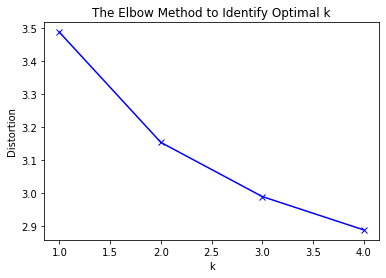

In [114]:
from scipy.spatial.distance import cdist
distortions = []
K = range(1, 5)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(dist_matrix)
    kmeanModel.fit(dist_matrix)
    distortions.append(sum(np.min(cdist(dist_matrix, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / dist_matrix.shape[0])
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method to Identify Optimal k')
plt.show()

#### From the Graph we can conclude the optimal K to be 2 or 3 which makes sense as we know that there are 4 different categories in our output labels with Jay & HM accounting for only 8 records

### Clustering Using  Kmeans

In [115]:
kmeans = KMeans(n_clusters=2) 
kmeans.fit(xtrain_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [116]:
xtrain = xtrain_norm.to_numpy()
correct = 0
for i in range(len(xtrain)):
    predict_me = np.array(xtrain[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(xtrain))

0.05405405405405406


#### Model Tuning

In [120]:
kmeans1 = KMeans(n_clusters=2,max_iter=300) 
kmeans1.fit(xtrain_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [121]:
xtrain = xtrain_norm.to_numpy()
correct = 0
for i in range(len(xtrain)):
    predict_me = np.array(xtrain[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans1.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(xtrain))

0.6891891891891891


In [122]:
kmeans2 = KMeans(n_clusters=2,max_iter=600, algorithm = 'auto') 
kmeans2.fit(xtrain_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [123]:
xtrain = xtrain_norm.to_numpy()
correct = 0
for i in range(len(xtrain)):
    predict_me = np.array(xtrain[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans2.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(xtrain))

0.05405405405405406


In [124]:
kmeans3 = KMeans(n_clusters=4,max_iter=600, algorithm = 'auto') 
kmeans3.fit(xtrain_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [125]:
xtrain = xtrain_norm.to_numpy()
correct = 0
for i in range(len(xtrain)):
    predict_me = np.array(xtrain[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans3.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(xtrain))

0.44594594594594594


In [126]:
kmeans4 = KMeans(n_clusters=3,max_iter= 600) 
kmeans4.fit(xtrain_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [127]:
xtrain = xtrain_norm.to_numpy()
correct = 0
for i in range(len(xtrain)):
    predict_me = np.array(xtrain[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans4.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(xtrain))

0.013513513513513514


In [128]:
kmeans5 = KMeans(n_clusters=2,n_init = 25 , max_iter= 100) 
kmeans5.fit(xtrain_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=2, n_init=25, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [129]:
xtrain = xtrain_norm.to_numpy()
correct = 0
for i in range(len(xtrain)):
    predict_me = np.array(xtrain[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans5.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(xtrain))

0.6621621621621622


####  we select the model with 2 clusters & 300 iterations  since it has the higest accuracy of 68%
#### kmeans = KMeans(n_clusters=2,max_iter=300) 
#### kmeans.fit(xtrain_norm)

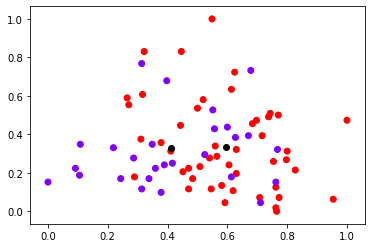

In [130]:
kmeans6 = KMeans(n_clusters=2,max_iter=300) 
kmeans6.fit(xtrain_norm)
y_kmeans = kmeans6.predict(xtrain_norm)
plt.scatter(xtrain_norm.iloc[:,0],xtrain_norm.iloc[:,1], c=y_kmeans, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

In [131]:
df['Predicted Labels'] = y_kmeans.tolist()
print(df)



   Actual Labels  Encoded Label  Predicted Labels
11      Hamilton              1                 1
12      Hamilton              1                 1
13      Hamilton              1                 1
14      Hamilton              1                 1
15      Hamilton              1                 1
16      Hamilton              1                 1
17      Hamilton              1                 1
18      Hamilton              1                 1
19      Hamilton              1                 1
20      Hamilton              1                 1
21      Hamilton              1                 1
22      Hamilton              1                 1
23      Hamilton              1                 1
24      Hamilton              1                 1
25      Hamilton              1                 1
26      Hamilton              1                 1
27      Hamilton              1                 1
28      Hamilton              1                 1
29      Hamilton              1                 0


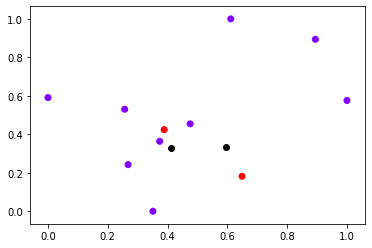

In [132]:
y_kmeans = kmeans6.predict(xtest_norm)
plt.scatter(xtest_norm.iloc[:,0],xtest_norm.iloc[:,1], c=y_kmeans, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

In [133]:
y_kmeans

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

#### From the above Viz we can Observer out the 11 Disputed 
#### 9 are classified as Madison
#### 2 are classified as Hamilton

#### Thus we conclude the disputed ones beong to Madison from Kmeans Clustering

# HAC

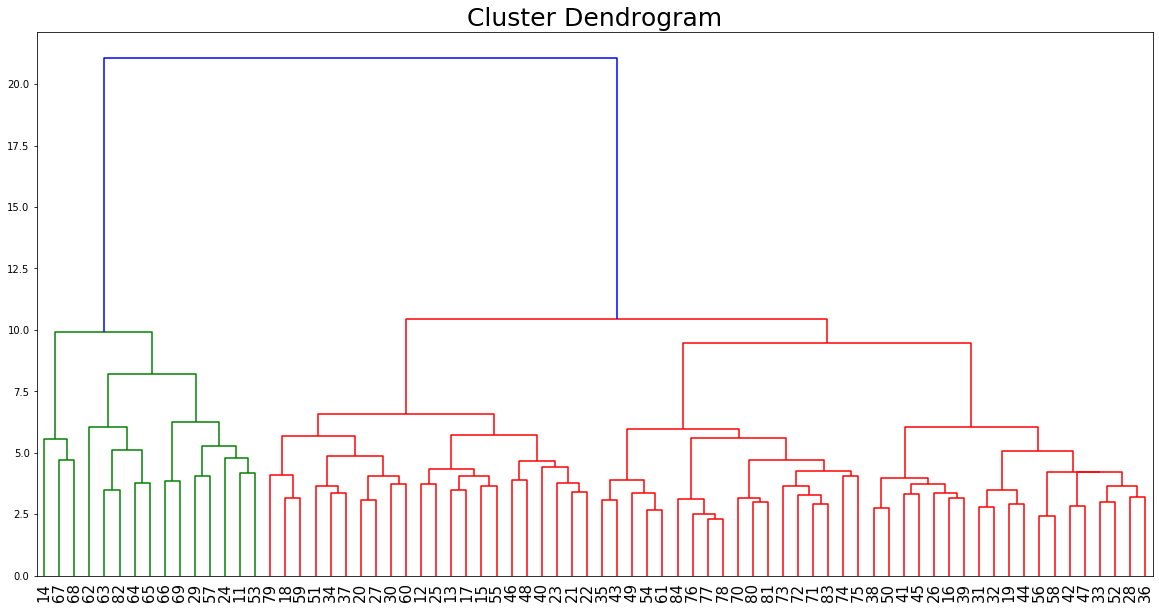

In [154]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist_matrix)

fig, ax = plt.subplots(figsize=(20, 10))
ax.grid(False)
ax.set_title('Cluster Dendrogram', fontsize = 25)
ax = dendrogram(linkage_matrix, orientation='top', labels=dist_matrix.index)
plt.xticks(fontsize=15)
plt.show()

In [211]:
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as ms

In [221]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(xtrain_norm)
labels = model.labels_

In [222]:
ms.accuracy_score(y,labels)

0.7297297297297297

In [223]:
df = pd.DataFrame({'Actual Labels' : ytrain[:],
                   'Encoded Label' : y[:],
                   'Predicted Labels' : labels[:]})

df



,Actual Labels,Encoded Label,Predicted Labels
11,Hamilton,1,1
12,Hamilton,1,1
13,Hamilton,1,1
14,Hamilton,1,1
15,Hamilton,1,1
16,Hamilton,1,1
17,Hamilton,1,1
18,Hamilton,1,1
19,Hamilton,1,1
20,Hamilton,1,1


In [224]:
model.fit(xtest_norm)
labels = model.labels_

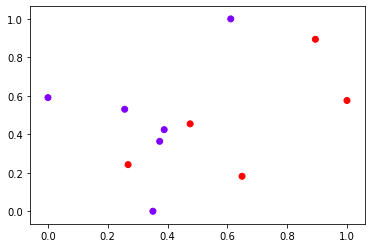

In [225]:
plt.scatter(xtest_norm.iloc[:,0],xtest_norm.iloc[:,1], c=labels, cmap='rainbow')

In [226]:

labels

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

#### Interpretation
##### 6 points are clustered into madison thus our Answer with Kmeans matches with HAC

# Decision tree

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
import numpy as np
np.random.seed(66)

In [9]:
clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [21]:
clf.fit(xtrain, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [22]:
y_pred = clf.predict(xtest)

In [23]:
y_pred

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [29]:
param_grid = {'criterion': ['gini', 'entropy'],
              'min_samples_split': [2, 10],
              'max_depth': [5, 10],
              'min_samples_leaf': [1, 5, 10],
              'max_leaf_nodes': [2, 4]}
grid = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy')
grid.fit(xtrain, y)

C:\Users\ritshetty\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 10],
                         'max_leaf_nodes': [2, 4],
    

In [30]:
print(grid.best_score_)

0.9054054054054054


In [31]:
for hps, values in grid.best_params_.items():
  print(f"{hps}: {values}")

criterion: gini
max_depth: 5
max_leaf_nodes: 4
min_samples_leaf: 1
min_samples_split: 2


# Section 3: Prediction and interpretation

##### The output obtained from decision tree prediction states that all the 11 disputed data i.e. test data belong to Madison. This output is similar to the result obtained from cluster analysis. Thus, all the disputed essays were written by Madison.


## Model Analysis & Comparison

##### From our model observations we can analyze that our **DT** Best Classifies the data compared tp Clusterong techniques